<h1><center>Causes of Significant changes in stock prices</center></h1>

### Author(s)

- Tay Rui Xian (@rx9988)
 

I chose to do this project as I am actively trading, and would like to know more about what affects the market sentiments.
I have decided to use Indexes from the USA(e.g. Dow Jones Industrial Average, Standard and Poor's 500), and various indexes from Asia (e.g. Singapore, Japan, Hong Kong etc).

I wish to find out which markets are the most voliatile, and find out which kinds of events (e.g. Political, Natural, Monetary) causes the positive and negative change in the price of stock market. (Im planning to do this using a wordcloud, and seeing the most common words through the news headlines.)



Hypothesis:
1. I believe that the stocks in the USA will be more voliatile, as westerners tend to take more risks and asians are more pragmatic. 

2. I believe Potitical events will be the main factors affecting the prices of the stock market. 



**Datasets used:**
- All Datasets of indexes used (https://sg.finance.yahoo.com/) retrieved on 18 May 2019
- Datasets of News Healines (https://www.kaggle.com/rmisra/news-category-dataset) retrieved on 18 May 2019


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json as json
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from datetime import datetime, timedelta
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB


%matplotlib inline

In [2]:
required_col = ['Date', 'Close']

In the cell below, I converted csv files into a dataframe. I then isolated the columns 'Date' and 'Close' which consists of the Date, and the closing price of the index on that date.

In [3]:
dowjones_df = pd.read_csv('dowjones-index.csv')
dowjones_df = dowjones_df[required_col]

hanseng_df = pd.read_csv('hanseng-index.csv')
hanseng_df = hanseng_df[required_col]

nasdaq_df = pd.read_csv('nasdaq-index.csv')
nasdaq_df = nasdaq_df[required_col]

nikkei_df = pd.read_csv('nikkei-index.csv')
nikkei_df = nikkei_df[required_col]

russel_df = pd.read_csv('russel-index.csv')
russel_df = russel_df[required_col]

sandp_df = pd.read_csv('sandp-index.csv')
sandp_df = sandp_df[required_col]

shanghai_df = pd.read_csv('shanghai-index.csv')
shanghai_df = shanghai_df[required_col]

st_df = pd.read_csv('st-index.csv')
st_df = st_df[required_col]

headline_df = pd.read_csv('abcnews-date-text.csv')



In [4]:
list_of_df = [dowjones_df, hanseng_df, russel_df, nasdaq_df, nikkei_df, sandp_df, shanghai_df, st_df]

Below is a function that creates a column named 'Percentage Change', which consists of the weekly percentage change in prices for the various stock indices.

In [5]:
def p_change(x):
    for df in x:
        df['Percentage Change'] = 0
        df['Percentage Change'] = df['Close']
        df['Percentage Change'] = df['Percentage Change'].pct_change()
        df['Percentage Change'] = df['Percentage Change'].apply(lambda x : x * 100)
        df.dropna(inplace = True, axis = 0)

        
  

In [6]:
p_change(list_of_df)

From the cell below, we can see that stocks are very voliatile and can change based on the sentiment of the market.


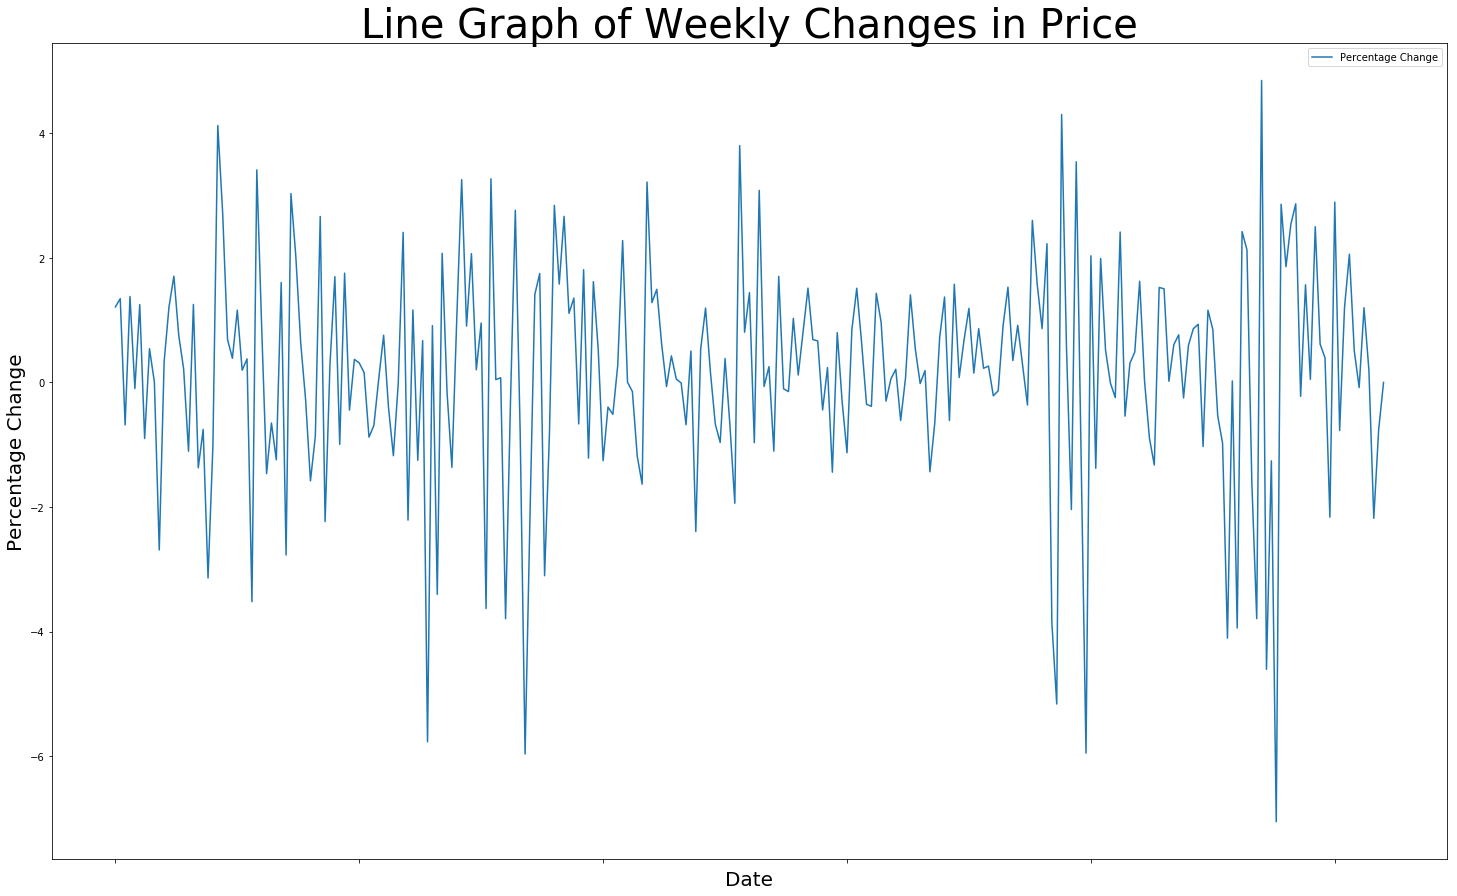

In [7]:
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111)

sandp_df.plot(x = 'Date', y = 'Percentage Change', ax = ax)
ax.set_title('Line Graph of Weekly Changes in Price', fontsize = 40)
ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Percentage Change', fontsize = 20)

plt.show()

In [8]:
colated_df = pd.DataFrame()
colated_df['dowjones'] = dowjones_df['Percentage Change']
colated_df['dowjones'] = dowjones_df['Percentage Change'] 
colated_df['hanseng'] = hanseng_df['Percentage Change'] 
colated_df['nasdaq'] = nasdaq_df['Percentage Change'] 
colated_df['nikkei'] = nikkei_df['Percentage Change'] 
colated_df['russel'] = russel_df['Percentage Change'] 
colated_df['sandp'] = sandp_df['Percentage Change'] 
colated_df['shanghai'] = shanghai_df['Percentage Change'] 
colated_df['st'] = st_df['Percentage Change'] 
colated_df.dropna().head()



,dowjones,hanseng,nasdaq,nikkei,russel,sandp,shanghai,st
1,0.667822,0.504188,1.357206,1.176932,0.737891,1.212289,0.228209,0.640823
2,1.238902,-0.566036,1.856866,3.040246,2.706916,1.344895,-0.453900,2.360292
3,-0.877668,1.604156,-0.248762,0.136627,-0.217120,-0.681217,2.007878,3.757010
4,1.021355,-0.536509,1.331357,1.666332,2.214711,1.379533,-2.126856,-0.844783
5,-0.561986,0.118388,0.684292,-1.657521,0.090030,-0.097308,0.485330,-2.245975


From the boxplot below, it is evident that indexes consisting of USA Stocks are generally less voliatle. As seen from the boxplots of DowJones, Nasdaq, S&P, and Russel; the percentage change from these indexes have lower 25 and 75 quartile ranges as compared to the Asian indexes (With the exception of Singapore's Straits Times Index Fund). Furthermore, the indexes consisting of USA Stocks have less outliers than the Asian Indexes.

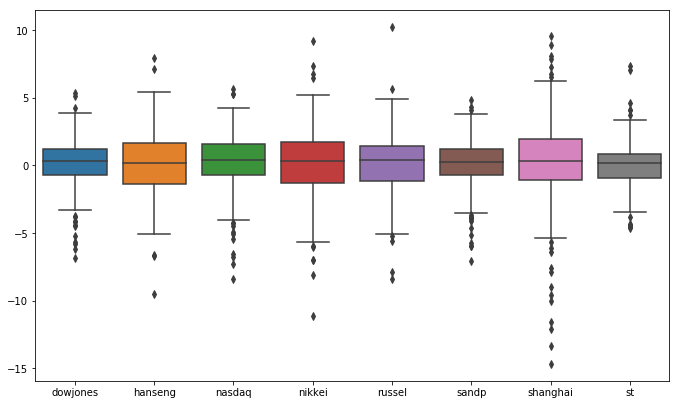

In [9]:
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(221)
sns.boxplot(data = colated_df)
plt.show()

I took out the unique values of the news category so that I can identify isolate the category(s) that would cause a change in stock prices, i.e 'Business'.

In [11]:
category_df = pd.read_json('News_Category_Dataset_v2.json', lines = True)
category_df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

Below, I took the Business category of the News. I then took the date, headline and short description of the News Dataset so that I can analyse it later on.

In [12]:
fin_cat_df = category_df.copy()
fin_cat_df = fin_cat_df[(fin_cat_df['category'] == 'BUSINESS')]
fin_cat_df = fin_cat_df[['category', 'date', 'headline', 'short_description']]
fin_cat_df.head()

news_consol_df = pd.DataFrame(columns = ['category', 'date', 'headline', 'short_description'])


In [13]:
token_df = category_df[['category','date', 'headline']]

Taking the news dataset, I isolated the headlines of the Business news and tokenise the words and remove the stopwords.

In [14]:
token_df = token_df[token_df['category'] == 'BUSINESS']
token_df['headline'] = token_df['headline'].str.lower()
token_df['headline'] = token_df['headline'].apply(lambda x : nltk.word_tokenize(x))


In [15]:
for row in token_df['headline']:
    for word in row:
        if word in stopwords.words('english'):
            row.remove(word)

<h1> Data Analysis </h1>
Below i decided to use the s&p index to perform analysis of how different words used in headlines will affect the changes in weekly closing price

I took out the outliers of the percentage price change of the s&p index (prices out of the 25th and 75th percentile), as this would affect the data analysis by affecting the mean and standard deviation. 

In [16]:
sandp_df_ab = sandp_df[(sandp_df['Percentage Change'] < -3.52028215521431) | 
                                   (sandp_df['Percentage Change'] > 4.056274898406903)]


I then created 2 dataframes, 1 dataframe of s&p index with negative weekly price change and 1 dataframe with positive weekly price change. 

After I took the dates in the dataframe, and seperated them into the different dates of the week. I did this as my dataset containing the news headlines were arranged in days. However my dataset containing my stock prices were in weeks. Therefore in order to properly analyse them, I had to generate the individual days in that week.

** *(I didnt just download a new dataset of daily stock price change as I wanted to see the correlation of weekly price changes to the headlines. By taking the daily stock price change, it would not be in line with my hypothesis and what i am trying to figure out)*

In [17]:
neg_sandp_ab_df = sandp_df_ab.copy()
pos_sandp_ab_df = sandp_df_ab.copy()

neg_sandp_ab_df = neg_sandp_ab_df[neg_sandp_ab_df['Percentage Change'] < 0]
pos_sandp_ab_df = pos_sandp_ab_df[pos_sandp_ab_df['Percentage Change'] > 0]


In [18]:
pos_sandp_ab_df['Date'] = pd.to_datetime(pos_sandp_ab_df['Date'])
neg_sandp_ab_df['Date'] = pd.to_datetime(neg_sandp_ab_df['Date'])


In [19]:
token_df['date'] = pd.to_datetime(token_df['date'])


In [20]:
list_of_dates_pos = pos_sandp_ab_df['Date'].tolist()
list_of_dates_neg = neg_sandp_ab_df['Date'].tolist()



In [21]:
def week(x):
    li = []
    for date in x:
        
        
        li.append(date)
        li.append(date - timedelta(days=1))
        li.append(date - timedelta(days=2))
        li.append(date - timedelta(days=3))
        li.append(date - timedelta(days=4))
        li.append(date - timedelta(days=5))
        li.append(date - timedelta(days=6))
        li.append(date - timedelta(days=7))
    return li
        

In [22]:
list_of_dates_pos = week(list_of_dates_pos)
list_of_dates_neg = week(list_of_dates_neg)



In [23]:
token_df_pos = token_df.copy()
token_df_pos = token_df_pos[token_df_pos['date'].isin(list_of_dates_pos)]


In [24]:
token_df_neg = token_df.copy()
token_df_neg = token_df_neg[token_df_neg['date'].isin(list_of_dates_neg)]


Using the regular expression library, I took out ''s' and 'n't' as they were tokenised and seperated from the original words, and that affected the data.

In [25]:
pos_str = ''
for row in token_df_pos['headline']:
    for word in row:
        pos_str = pos_str + ' ' + str(word)
pos_str = re.sub("'s ", '', pos_str)
pos_str = re.sub("n't ", '', pos_str)



In [26]:
neg_str = ''
for row in token_df_neg['headline']:
    for word in row:
        neg_str = neg_str + ' ' + str(word)
neg_str = re.sub("'s ", '', neg_str)
neg_str = re.sub("n't ", '', neg_str)



From the wordcloud below, we can see that the significant words(that makes sense financially) in the headlines during an abnormal positive weekly gain in the index price are 'Business' , 'minimum wage', 'job'. These words could indicate that improvement in job prospects is one of the main factor that leads to significant gains in stock prices.

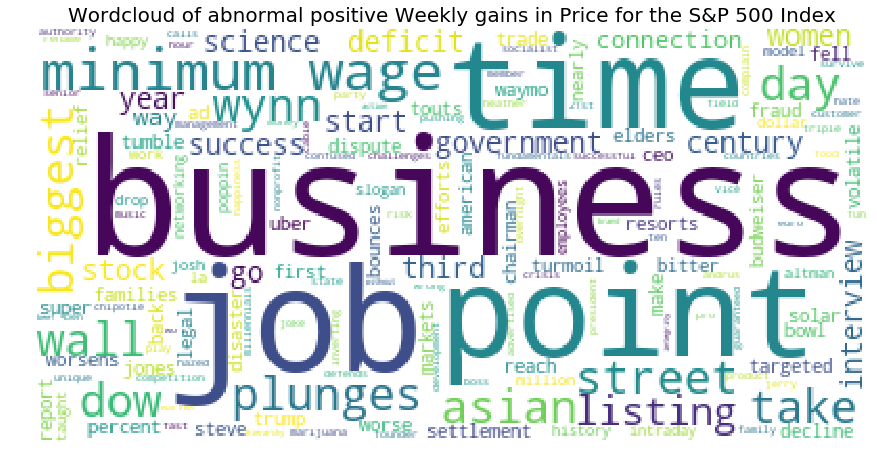

In [27]:
plt.figure(figsize=(15,8))

# create wordcloud here
pos_wordcloud = WordCloud(background_color="white").generate(pos_str)

plt.imshow(pos_wordcloud)
plt.axis("off")
plt.title("Wordcloud of abnormal positive Weekly gains in Price for the S&P 500 Index", fontsize=20)
plt.show()

From the wordcloud below, we can see that the significant words that causes a significant dip in the weekly stock prices do not have a recurrent theme. There are words like 'Trump' , '(Teresa?) May' , 'Sexual Harrassment' , 'parental leave', 'Steve Wynn'. These words contain names of political figures, issues and a business man. 

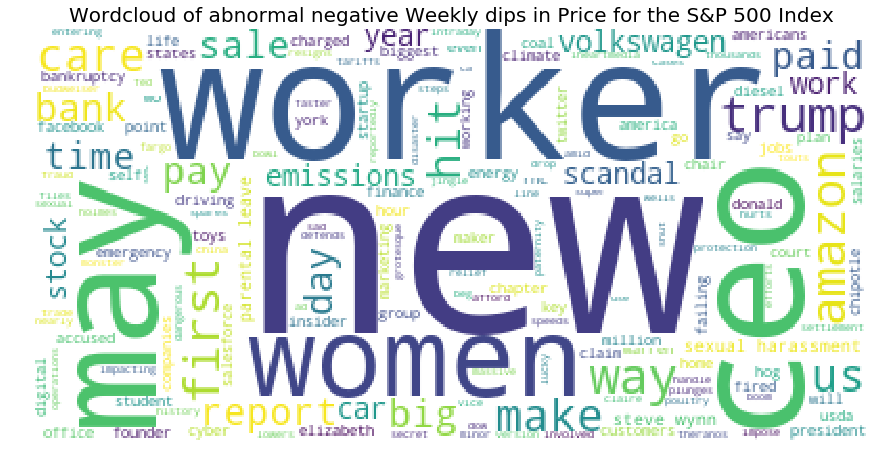

In [28]:
plt.figure(figsize=(15,8))

# create wordcloud here
neg_wordcloud = WordCloud(background_color="white").generate(neg_str)

plt.imshow(neg_wordcloud)
plt.axis("off")
plt.title("Wordcloud of abnormal negative Weekly dips in Price for the S&P 500 Index", fontsize=20)
plt.show()

<h5>Conclusion<h5>
    
    
1. The USA market is much more stable than asian markets, with exception to Singapore.


2. Although there are certain words that points towards a common topic which leads to a significant increase in stock prices, there isn't a common theme for the words in the headlines during a significant decrease in stock prices.
    
What could be improved?

1. Better datasets on news headlines can be sourced and scraped.
    


<h1> Using of Naive Bayes Model</h1>
I modelled the data against the Naive Bayes model <b>trying</b> to create a prediction model for the changes in stock prices

--> sentiment of positive change in stock price is indicated by 1, and negative as 0

In [29]:
token_df_pos_sentiment = token_df_pos.copy()
token_df_neg_sentiment = token_df_neg.copy()

In [30]:
token_df_neg_sentiment['sentiment'] = 0
token_df_pos_sentiment['sentiment'] = 1


In [31]:
token_df_sentiment = token_df_neg_sentiment.append(token_df_pos_sentiment, sort=True)

In [32]:
token_df

,category,date,headline
87,BUSINESS,2018-05-24,"[u.s., launches, auto, import, probe, ,, china..."
337,BUSINESS,2018-05-20,"[starbucks, says, anyone, now, sit, its, cafes..."
603,BUSINESS,2018-05-15,"[seattle, passes, controversial, new, tax, cit..."
604,BUSINESS,2018-05-15,"[uber, ends, forced, arbitration, individual, ..."
669,BUSINESS,2018-05-14,"[chili, 's, hit, data, breach, ,, credit, debi..."
711,BUSINESS,2018-05-12,"[uber, silences, women, sexual, assaults]"
715,BUSINESS,2018-05-12,"[amazon, holding, seattle, hostage]"
976,BUSINESS,2018-05-08,"[bank, america, appears, flip, firearm, promis..."
1217,BUSINESS,2018-05-03,"[ex-volkswagen, ceo, charged, u.s., emissions,..."
1295,BUSINESS,2018-05-02,"[women, describe, rampant, groping, ,, sexual,..."


In [33]:
nb_df = category_df[['category','date', 'headline']]

In [34]:
nb_df = nb_df[nb_df['category'] == 'BUSINESS']

In [35]:
nb_df_pos = nb_df.copy()
nb_df_pos = nb_df_pos[nb_df_pos['date'].isin(list_of_dates_pos)]

In [36]:
nb_df_neg = nb_df.copy()
nb_df_neg = nb_df_neg[nb_df_neg['date'].isin(list_of_dates_neg)]

In [37]:
nb_df_neg['sentiment'] = 0
nb_df_pos['sentiment'] = 1


In [50]:
nb_df_sent = nb_df_neg.append(nb_df_pos, sort = False)

In [51]:
X = nb_df_sent['headline']
y = nb_df_sent['sentiment']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)


In [52]:
count_vect = CountVectorizer(stop_words = stopwords.words('english'))
train_X_vect = count_vect.fit_transform(X_train)


In [53]:
print(len(count_vect.vocabulary_.keys()))
print(train_X_vect.A.shape)


598
(111, 598)


In [54]:
clf = MultinomialNB().fit(train_X_vect, y_train)

In [55]:
test_X_vect = count_vect.transform(X_test)

y_predict = clf.predict(test_X_vect)
print(y_predict)

[1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0]


In [56]:
y_confusion_df = pd.DataFrame({"y_test": y_test, "y_predict" : y_predict})
y_confusion_df.head()

,y_test,y_predict
70488,0,1
6236,0,1
72729,0,0
109085,1,1
70556,0,0


In [57]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[22  6]
 [ 4  5]]


Below is a confusion matrix which shows the accuracy of the model prediction, the accuracy being 73%

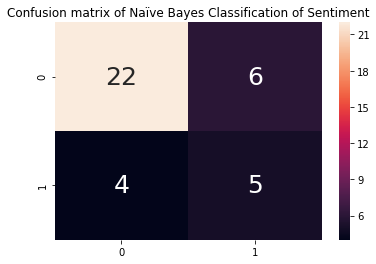

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Naïve Bayes Classification of Sentiment")
plt.show()

In [59]:
# Your turn: What is the meaning of this expression?
print(cm[0][0])

# Your turn: What is the meaning of this expression?
print(cm[1][1])

# Your turn: What is the meaning of this expression?
print(sum(sum(cm)))

# Accuracy is calculated here.
print((cm[0][0] + cm[1][1])/sum(sum(cm)))

22
5
37
0.7297297297297297


These are the news headlines that are predicted wrongly

In [60]:
mismatch_df = nb_df_sent.copy().join(y_confusion_df)
# Then filter for all values that are in the indices where the actual and predicted label
# do not match.
mismatch_df = mismatch_df[~(mismatch_df['y_predict'].isnull())]
mismatch_df = mismatch_df[~(mismatch_df['y_predict'] == mismatch_df['y_test'] )]

mismatch_df.sample(5)

,category,date,headline,sentiment,y_test,y_predict
109357,BUSINESS,2014-10-15,The Three Imperatives of Authentic Branding,1,1.0,0.0
6236,BUSINESS,2018-02-05,Budweiser Touts Disaster Relief Efforts In 201...,1,0.0,1.0
6236,BUSINESS,2018-02-05,Budweiser Touts Disaster Relief Efforts In 201...,0,0.0,1.0
75480,BUSINESS,2015-11-05,"Facebook Profit Soars, Stock Hits All-Time High",0,0.0,1.0
70488,BUSINESS,2016-01-02,4 Ways to Tell Clients Why You Are Valuable,0,0.0,1.0
